In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

In [132]:
path = "/Users/sethfried/Fantasy Football/Cleaned Data/Player_Combines/"
all_combine_df = pd.DataFrame()

for year in range(2006, 2025):
    file_path = f"{path}combine_{year}.csv"
    df = pd.read_csv(file_path)
    df['Year'] = year
    all_combine_df = pd.concat([all_combine_df, df], ignore_index=True)
    


def convert_height_to_inches(ht_str):
    try:
        feet, inches = map(int, ht_str.split('-'))
        return feet * 12 + inches
    except (ValueError, AttributeError):
        return None

all_combine_df['Ht_in'] = all_combine_df['Ht'].apply(convert_height_to_inches)

print(all_combine_df.head())
print(f"\nTotal rows in combined DataFrame: {len(all_combine_df)}")
print(f"Total columns in combined DataFrame: {all_combine_df.shape[1]}")


             Player Pos          School        College    Ht     Wt  40yd  \
0      Joseph Addai  RB             LSU  College Stats  5-11  214.0  4.40   
1    David Anderson  WR  Colorado State  College Stats  5-10  192.0  4.57   
2  Devin Aromashodu  WR          Auburn  College Stats   6-2  201.0  4.35   
3      Miles Austin  WR   Monmouth (NJ)            NaN   6-2  215.0  4.47   
4       Jason Avant  WR        Michigan  College Stats   6-0  212.0  4.62   

   Vertical  Bench  Broad Jump  3Cone  Shuttle  \
0      38.5   18.0       125.0   7.09     4.47   
1      34.0    NaN       116.0   6.88     4.20   
2      39.0    NaN       120.0   7.04     4.16   
3      40.5   21.0       123.0   7.09     4.14   
4      37.0   20.0       118.0    NaN      NaN   

                            Drafted (tm/rnd/yr)  Year  Ht_in  
0    Indianapolis Colts / 1st / 30th pick /2006  2006   71.0  
1       Houston Texans / 7th / 251st pick /2006  2006   70.0  
2       Miami Dolphins / 7th / 233rd pick /2006

In [133]:
print(all_combine_df.columns)

Index(['Player', 'Pos', 'School', 'College', 'Ht', 'Wt', '40yd', 'Vertical',
       'Bench', 'Broad Jump', '3Cone', 'Shuttle', 'Drafted (tm/rnd/yr)',
       'Year', 'Ht_in'],
      dtype='object')


In [134]:
pos = ["qb", "rb", "te", "wr"]
dfs = []

for position in pos:
    try:
        df = pd.read_csv(f"/Users/sethfried/Fantasy Football/Cleaned Data/Player_Season_stats/{position}_season_stats")
        df["POS"] = position.upper()
        dfs.append(df)
    except FileNotFoundError:
        print(f"File not found for position {position}. Please check the stats file path.")
        continue

stats_df = pd.concat(dfs, ignore_index=True)
stats_df = stats_df.fillna(0)
stats_df = stats_df.dropna(how="all")
stats_df = stats_df.drop_duplicates()
stats_df = stats_df.rename(columns={"Year_x": "Year"})
print(stats_df.head())

          Player  Year Team  games  pass_att  pass_cmp  pass_yds  pass_td  \
0    A.J. Feeley  2006  PHI     16      38.0      26.0     342.0      3.0   
1    A.J. Feeley  2007  PHI     16     103.0      59.0     681.0      5.0   
2  A.J. McCarron  2015  CIN     16     119.0      79.0     854.0      6.0   
3  A.J. McCarron  2016  CIN     16       0.0       0.0       0.0      0.0   
4  A.J. McCarron  2017  CIN     16      14.0       7.0      66.0      0.0   

   pass_int  rush_att  ...  rec_yds_pg  rec_yds_adj_pg  rush_share  rec_tgt  \
0       0.0       1.0  ...         0.0             0.0         0.0      0.0   
1       8.0       7.0  ...         0.0             0.0         0.0      0.0   
2       2.0      14.0  ...         0.0             0.0         0.0      0.0   
3       0.0       0.0  ...         0.0             0.0         0.0      0.0   
4       0.0       0.0  ...         0.0             0.0         0.0      0.0   

   rec_ctch_pct  rec_yptgt  rush_ypc  rec_tgt_pg  rec_td_pg  r

In [135]:
print(stats_df.columns)

Index(['Player', 'Year', 'Team', 'games', 'pass_att', 'pass_cmp', 'pass_yds',
       'pass_td', 'pass_int', 'rush_att', 'rush_yds', 'rush_td', 'fumbles',
       'avg_off_rank', 'avg_def_rank', 'team_pass_att', 'team_pass_yds',
       'team_rush_att', 'team_tot_off', 'pass_yds_adj', 'rush_yds_adj',
       'pass_att_pg', 'pass_cmp_pg', 'pass_yds_pg', 'pass_td_pg',
       'pass_int_pg', 'rush_att_pg', 'rush_yds_pg', 'rush_td_pg', 'fumbles_pg',
       'pass_yds_adj_pg', 'rush_yds_adj_pg', 'pct_q', 'pct_ir', 'pct_p',
       'pct_d', 'pct_o', 'pct_s', 'pass_share', 'depth_rank', 'POS', 'rec',
       'rec_yds', 'rec_td', 'rec_yds_adj', 'rec_pg', 'rec_yds_pg',
       'rec_yds_adj_pg', 'rush_share', 'rec_tgt', 'rec_ctch_pct', 'rec_yptgt',
       'rush_ypc', 'rec_tgt_pg', 'rec_td_pg', 'rec_share'],
      dtype='object')


/var/folders/5b/zyfxmg1n27sc10rqxm40tr3r0000gn/T/ipykernel_27216/2014984545.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pos', y='40yd', data=df_filtered, palette='viridis')


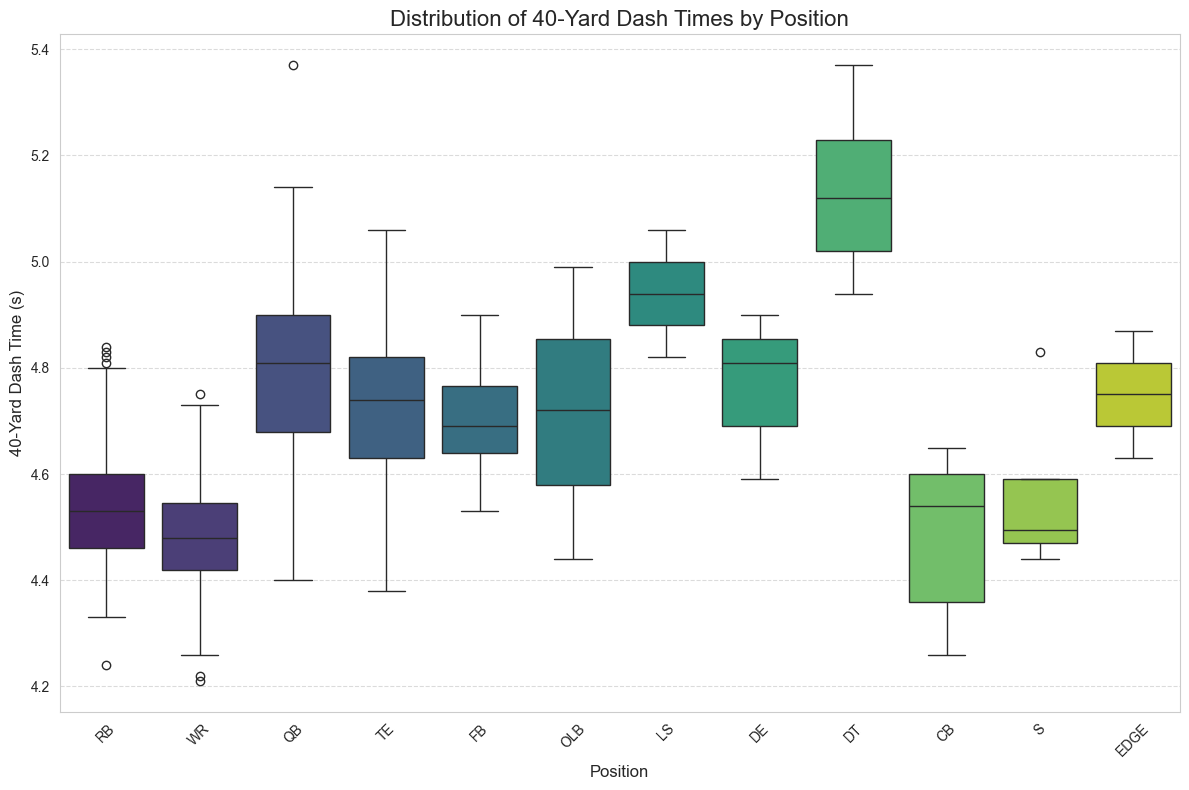

In [136]:
pos_not_included = ['OG','DB','LB','G','DL','OT','ILB']
df_filtered = all_combine_df[~all_combine_df['Pos'].isin(pos_not_included)].copy()
plt.figure(figsize=(12, 8))
sns.boxplot(x='Pos', y='40yd', data=df_filtered, palette='viridis')
plt.title('Distribution of 40-Yard Dash Times by Position', fontsize=16)
plt.xlabel('Position', fontsize=12)
plt.ylabel('40-Yard Dash Time (s)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

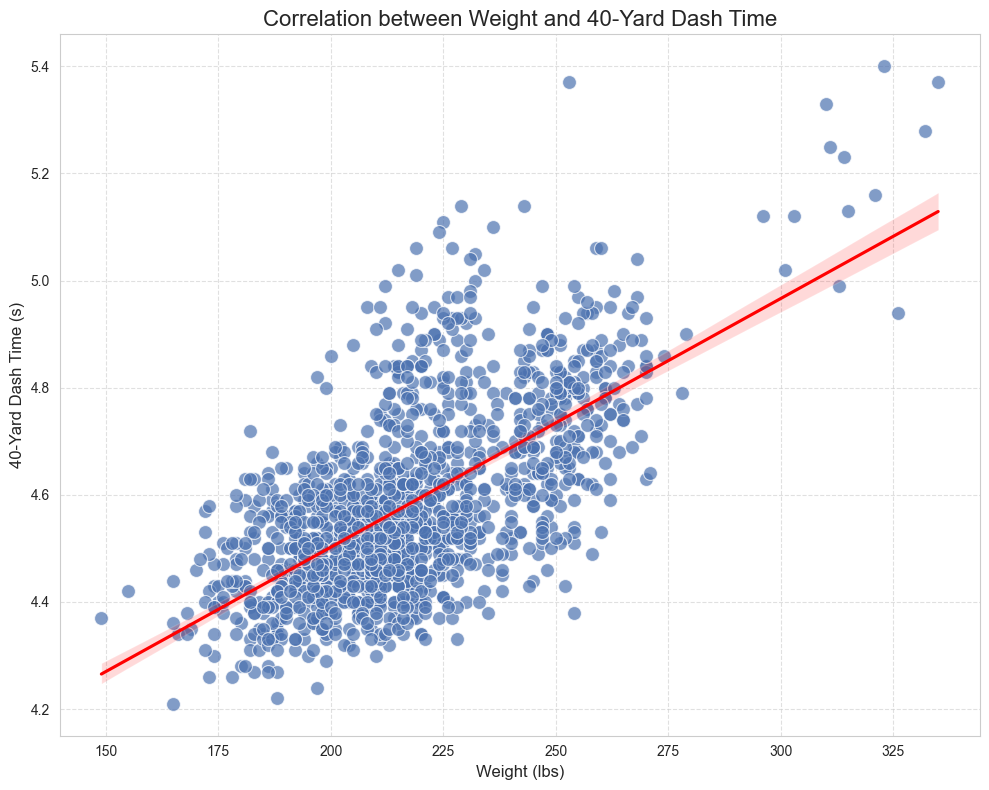

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Wt', y='40yd', data=all_combine_df, s=100, alpha=0.7)
sns.regplot(x='Wt', y='40yd', data=all_combine_df, scatter=False, color='red')
plt.title('Correlation between Weight and 40-Yard Dash Time', fontsize=16)
plt.xlabel('Weight (lbs)', fontsize=12)
plt.ylabel('40-Yard Dash Time (s)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

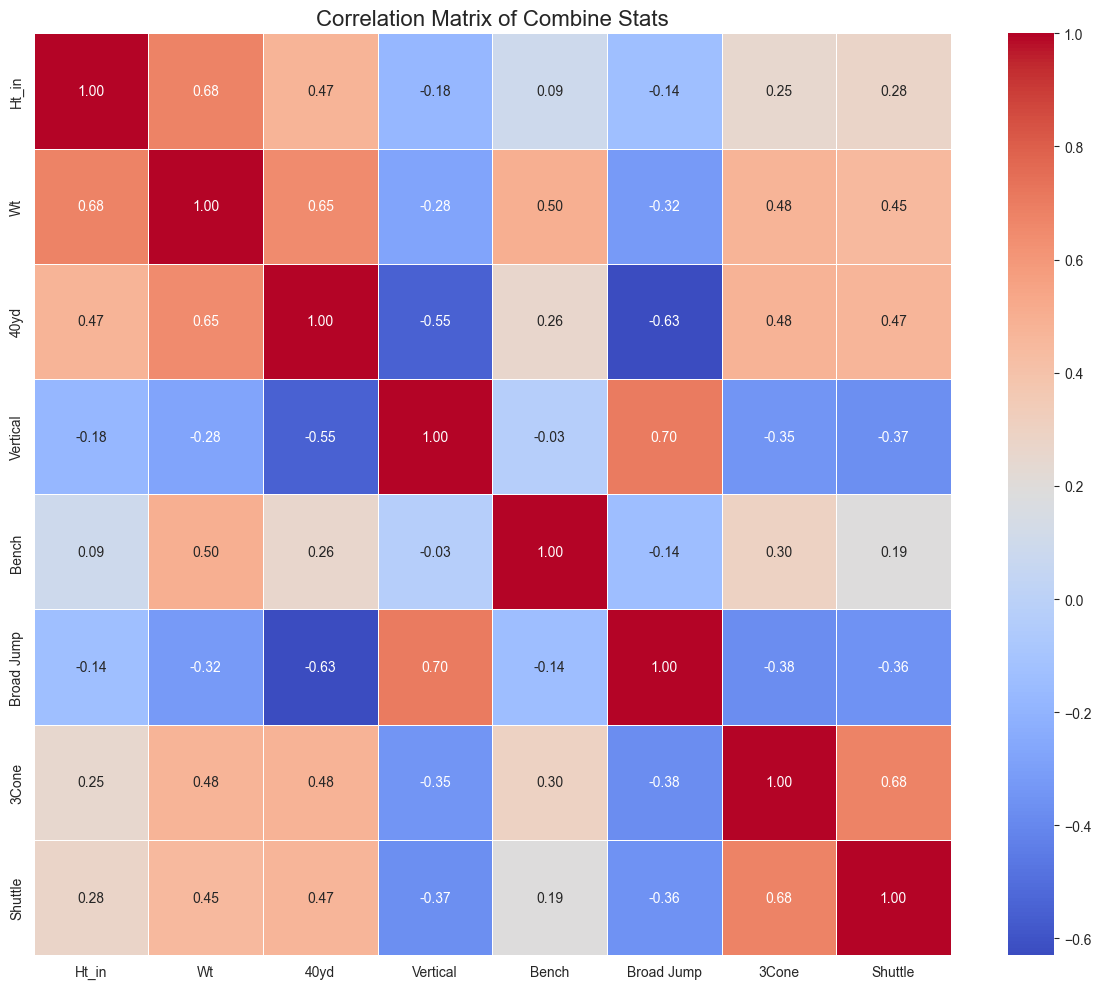

In [ ]:
numeric_cols = ['Ht_in', 'Wt', '40yd', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle']
corr_matrix = all_combine_df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Combine Stats', fontsize=16)
plt.tight_layout()
plt.show()

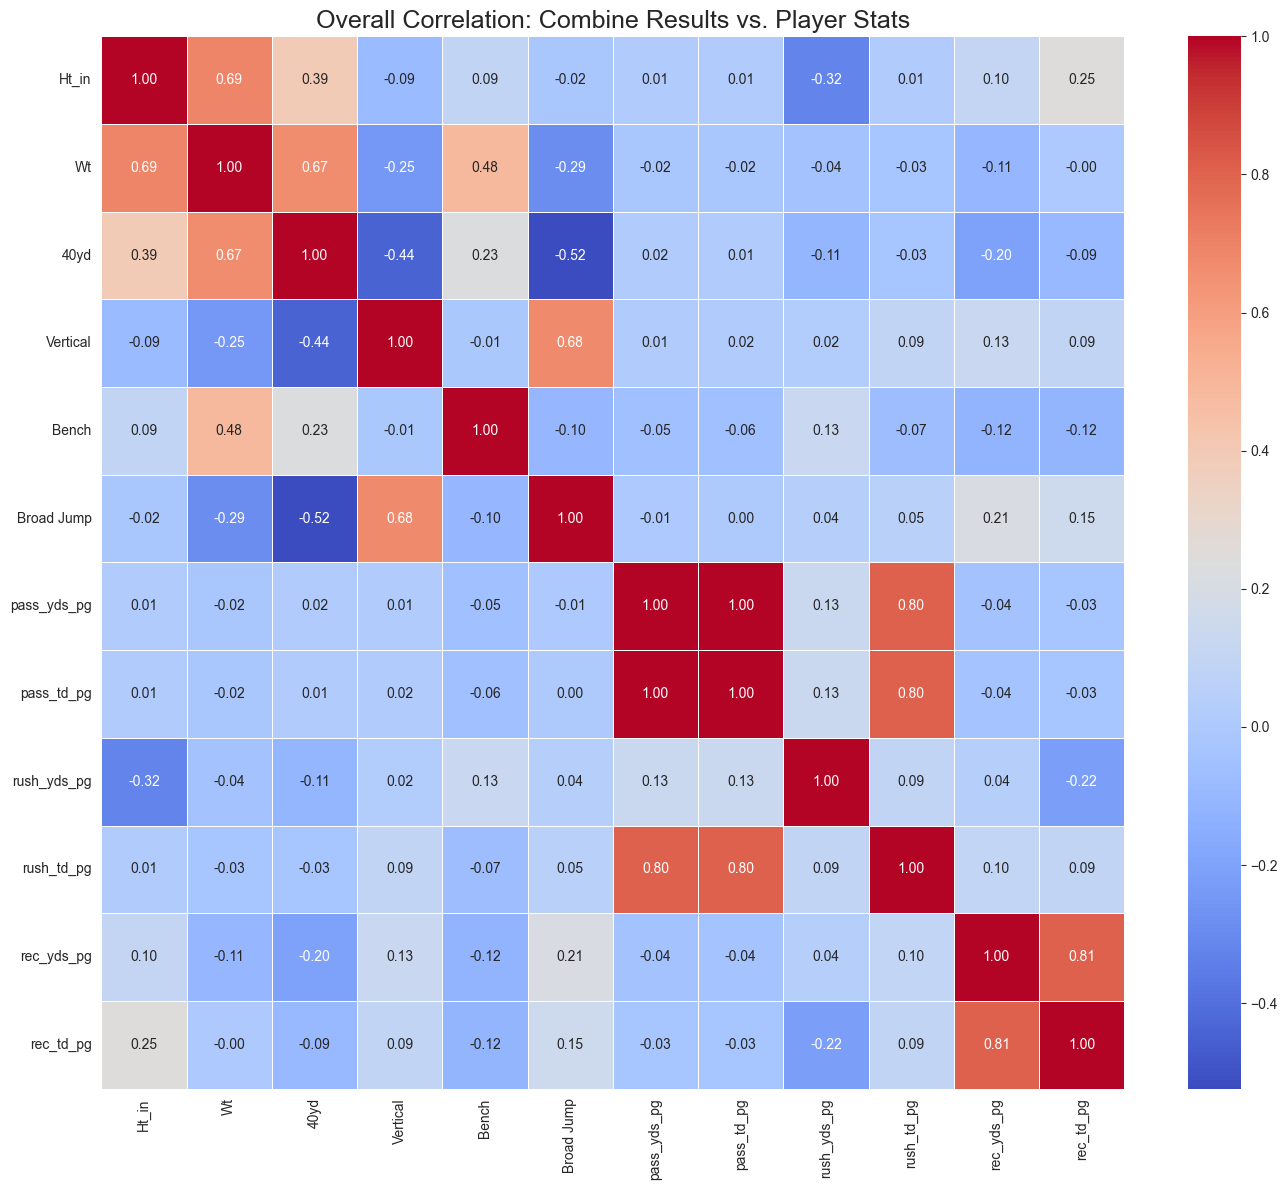


--- Analyzing QB Position (5 players) ---


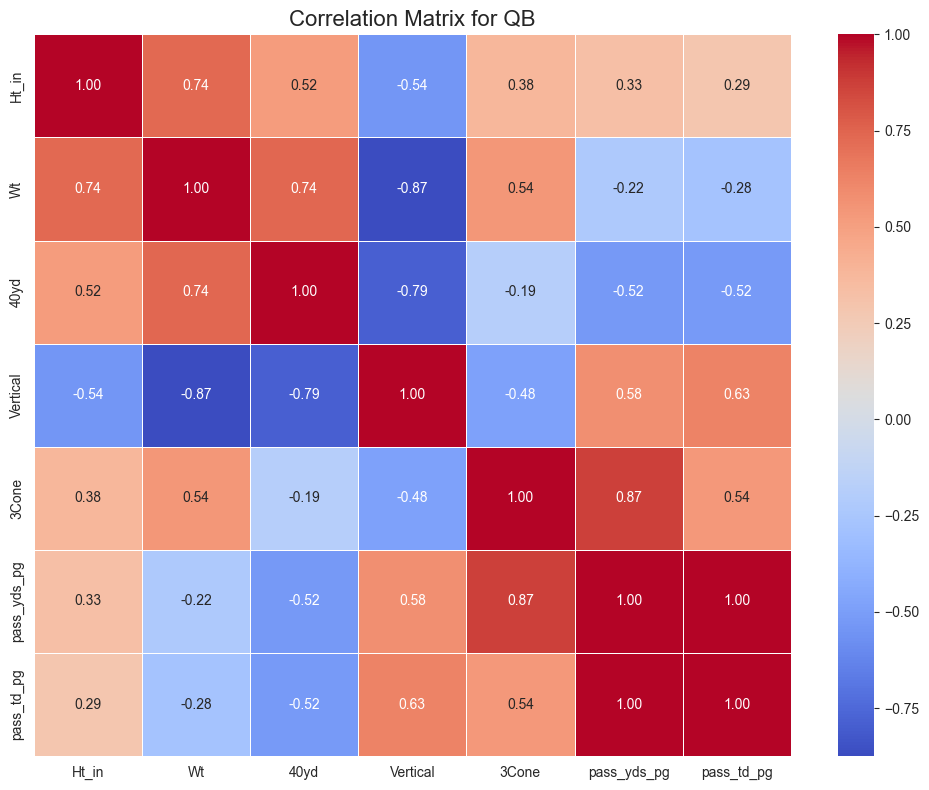


--- Analyzing RB Position (212 players) ---


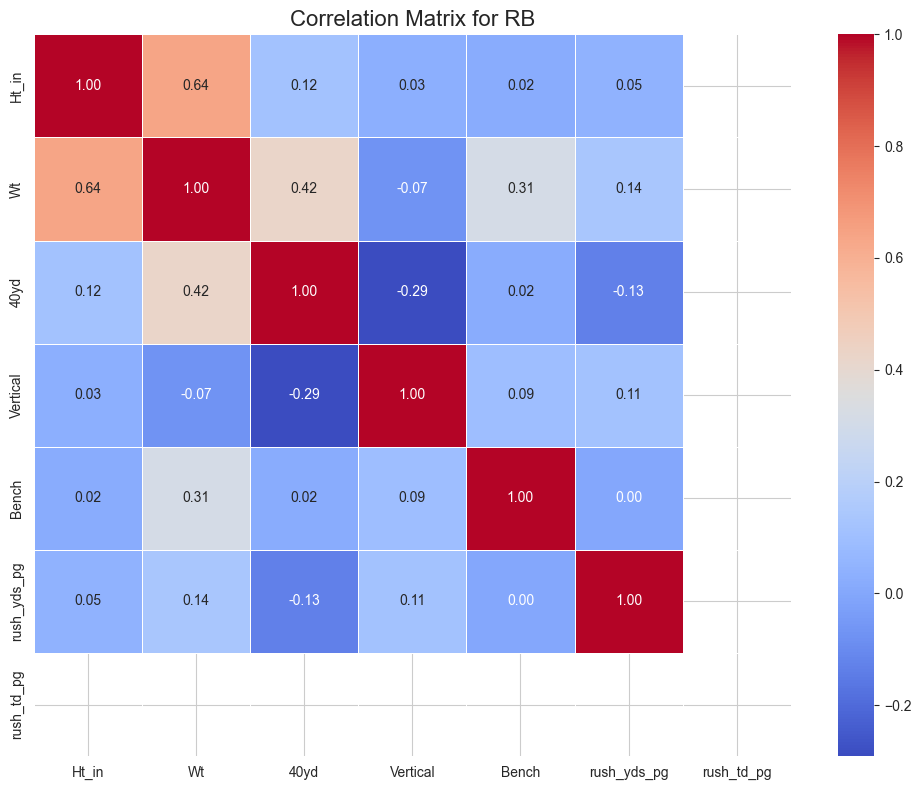

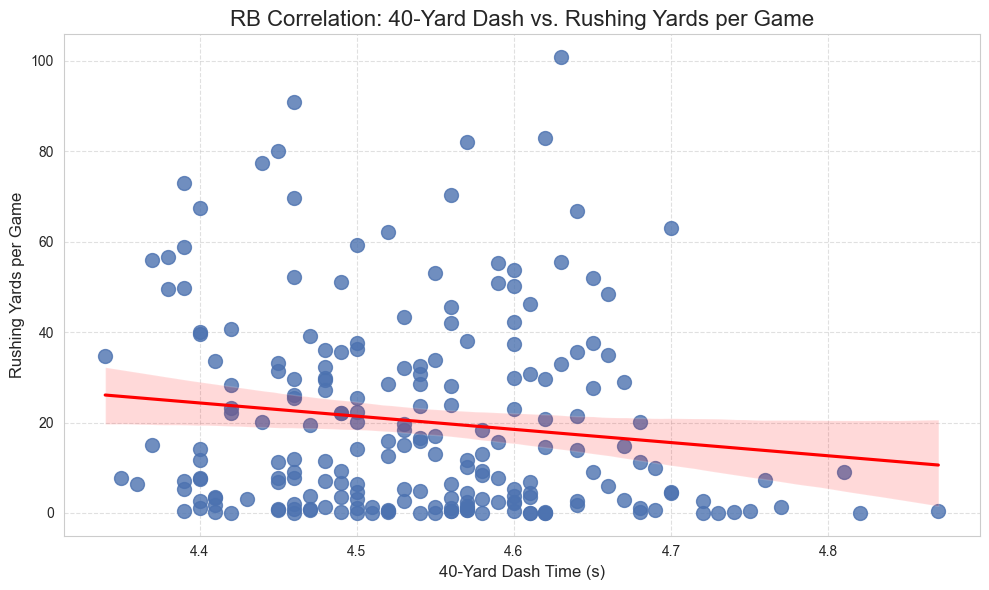


--- Analyzing WR Position (231 players) ---


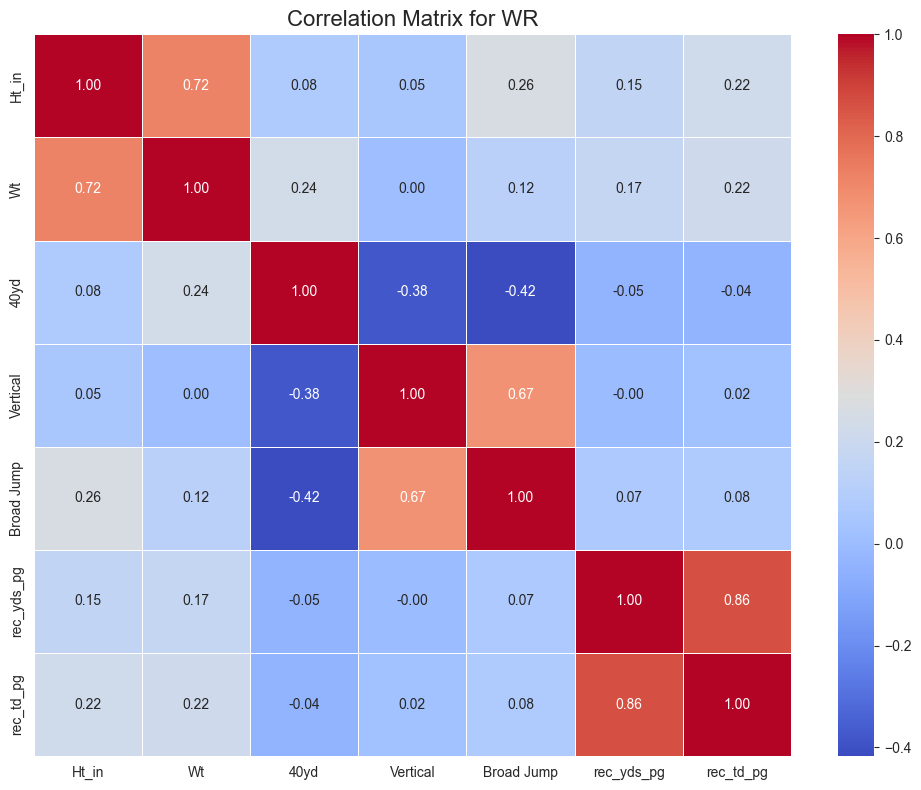

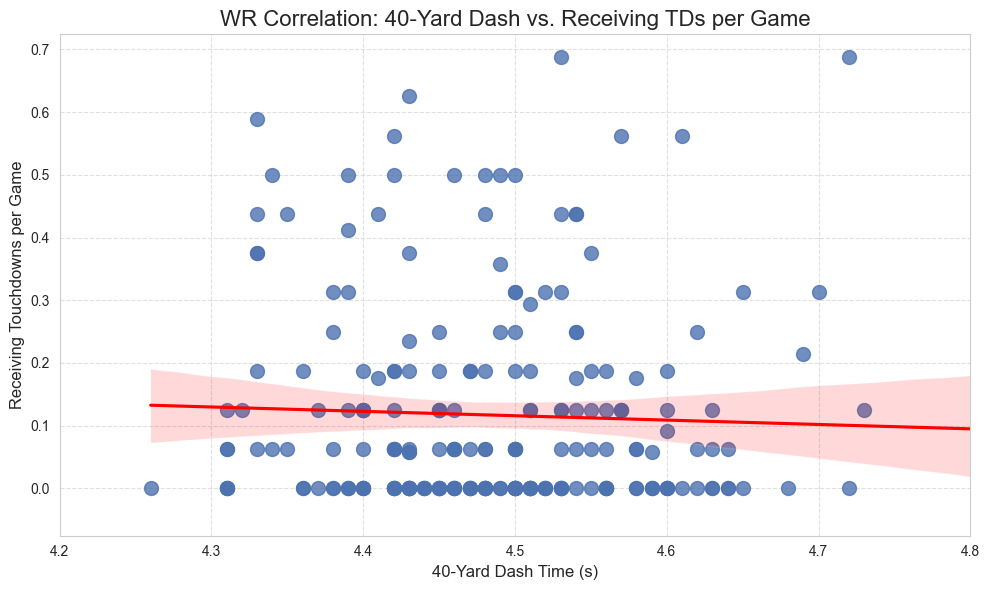


--- Analyzing TE Position (130 players) ---


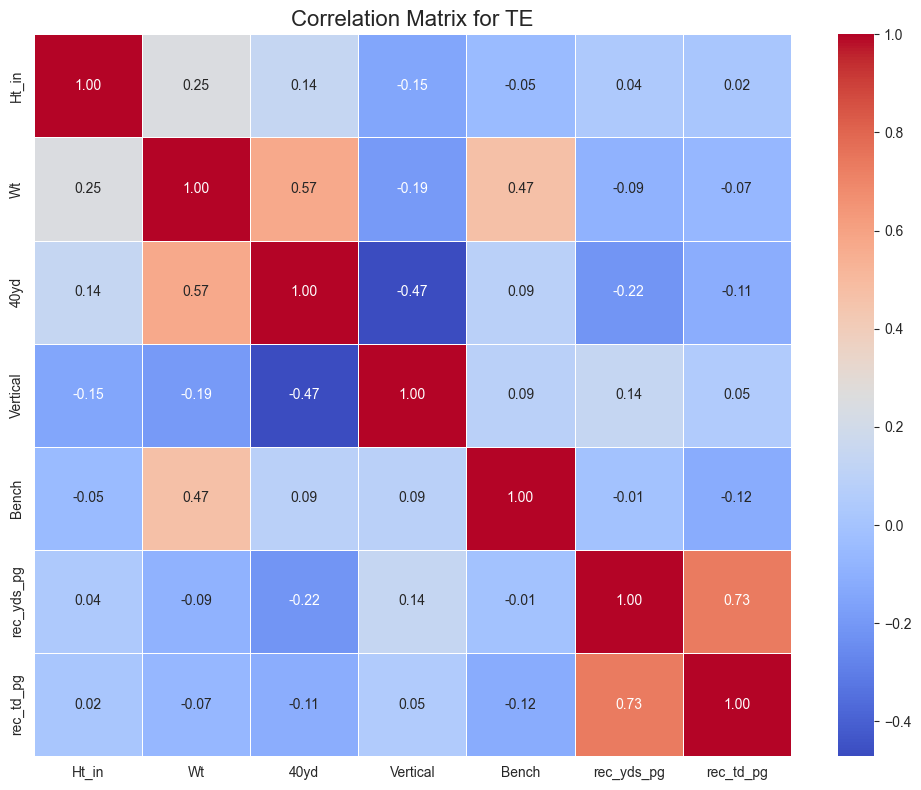

In [ ]:
combined_df = pd.merge(all_combine_df, stats_df, on=['Player', 'Year'], how='inner')

combined_df.dropna(subset=['Wt', '40yd', 'Vertical', 'Bench', 'Broad Jump',
                           'pass_yds_pg', 'rush_yds_pg', 'rec_yds_pg'], inplace=True)


combine_metrics = ['Ht_in', 'Wt', '40yd', 'Vertical', 'Bench', 'Broad Jump']
stats_metrics = ['pass_yds_pg', 'pass_td_pg', 'rush_yds_pg', 'rush_td_pg', 'rec_yds_pg', 'rec_td_pg']
all_metrics = combine_metrics + stats_metrics

overall_corr = combined_df[all_metrics].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(overall_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Overall Correlation: Combine Results vs. Player Stats', fontsize=18)
plt.tight_layout()
plt.show()

positions = ['QB', 'RB', 'WR', 'TE']

for pos in positions:
    pos_df = combined_df[combined_df['POS'] == pos]
    if pos_df.empty:
        print(f"No data to analyze for position: {pos}")
        continue
    
    print(f"\n--- Analyzing {pos} Position ({len(pos_df)} players) ---")

    if pos == 'QB':
        pos_combine = ['Ht_in', 'Wt', '40yd', 'Vertical', '3Cone']
        pos_stats = ['pass_yds_pg', 'pass_td_pg']
    elif pos == 'RB':
        pos_combine = ['Ht_in', 'Wt', '40yd', 'Vertical', 'Bench']
        pos_stats = ['rush_yds_pg', 'rush_td_pg']
    elif pos == 'WR':
        pos_combine = ['Ht_in', 'Wt', '40yd', 'Vertical', 'Broad Jump']
        pos_stats = ['rec_yds_pg', 'rec_td_pg']
    elif pos == 'TE':
        pos_combine = ['Ht_in', 'Wt', '40yd', 'Vertical', 'Bench']
        pos_stats = ['rec_yds_pg', 'rec_td_pg']
        
    pos_corr = pos_df[pos_combine + pos_stats].corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(pos_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title(f'Correlation Matrix for {pos}', fontsize=16)
    plt.tight_layout()
    plt.show()

    if pos == 'RB':
        plt.figure(figsize=(10, 6))
        sns.regplot(x='40yd', y='rush_yds_pg', data=pos_df, scatter_kws={'s': 100}, line_kws={'color': 'red'})
        plt.title(f'{pos} Correlation: 40-Yard Dash vs. Rushing Yards per Game', fontsize=16)
        plt.xlabel('40-Yard Dash Time (s)', fontsize=12)
        plt.ylabel('Rushing Yards per Game', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()
    
    if pos == 'WR':
        plt.figure(figsize=(10, 6))
        sns.regplot(x='40yd', y='rec_td_pg', data=pos_df, scatter_kws={'s': 100}, line_kws={'color': 'red'})
        plt.title(f'{pos} Correlation: 40-Yard Dash vs. Receiving TDs per Game', fontsize=16)
        plt.xlabel('40-Yard Dash Time (s)', fontsize=12)
        plt.ylabel('Receiving Touchdowns per Game', fontsize=12)
        plt.xlim(4.2,4.8)
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()
